In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import davies_bouldin_score, mean_squared_error, pairwise_distances, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MaxAbsScaler, OrdinalEncoder, StandardScaler

In [2]:
games = pd.read_csv("games.csv")
games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [3]:
users = pd.read_csv("users.csv")
users

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


In [4]:
recommendations = pd.read_csv("recommendations.csv")
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792


In [5]:
user_recommendations_combined_data = pd.merge(users, recommendations, on='user_id', how='left')
user_recommendations_combined_data

,user_id,products,reviews,app_id,helpful,funny,date,is_recommended,hours,review_id
0,7360263,359,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14020781,156,1,730.0,0.0,0.0,2020-09-13,True,515.9,388620.0
2,8762579,329,4,1259420.0,5.0,0.0,2021-05-18,True,78.9,3215990.0
3,8762579,329,4,271590.0,0.0,0.0,2022-04-11,True,397.3,3268615.0
4,8762579,329,4,1029690.0,0.0,0.0,2022-11-26,True,67.6,8508897.0
...,...,...,...,...,...,...,...,...,...,...
41679794,5047430,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41679795,5048153,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41679796,5059205,31,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41679797,5074363,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
game_recommendations_combined_data = pd.merge(games, recommendations, on='app_id', how='left')
game_recommendations_combined_data

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,2.0,0.0,2015-05-30,True,0.4,3369378.0,14254690.0
1,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,4.0,0.0,2014-07-25,False,15.2,11294916.0,14254698.0
2,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,0.0,0.0,2021-12-15,True,19.4,11708578.0,14254708.0
3,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,13.0,0.0,2022-08-11,True,10.8,4177110.0,14254726.0
4,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,0.0,0.0,2021-05-18,False,10.9,8472871.0,14254752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41168051,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41168052,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41168053,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41168054,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
final_game_features = pd.DataFrame(games, columns=['app_id', 'title', 'date_release', 'accessibility', 'rating', 'positive_ratio', 'price_final'])

# Get features from recommendations
final_game_features['accessibility'] = games['win'].astype(int) + games['mac'].astype(int) + games['linux'].astype(int) + games['steam_deck'].astype(int)

game_hours_played = recommendations.groupby('app_id')['hours'].sum().reset_index()
game_hours_played = game_hours_played.rename(columns={'hours': 'total_hours_reported'})
final_game_features = pd.merge(final_game_features, game_hours_played, on='app_id', how='left')
final_game_features['total_hours_reported'] = final_game_features['total_hours_reported'].fillna(0)

avg_game_hours_played = recommendations.groupby('app_id')['hours'].mean().reset_index()
avg_game_hours_played = avg_game_hours_played.rename(columns={'hours': 'avg_hours_reported'})
final_game_features = pd.merge(final_game_features, avg_game_hours_played, on='app_id', how='left')
final_game_features['avg_hours_reported'] = final_game_features['avg_hours_reported'].fillna(0)

temp = game_recommendations_combined_data.groupby('app_id').agg(
    total_recommendations=('is_recommended', 'count'),  # Count total recommendations per game
    positive_recommendations=('is_recommended', 'sum')  # Count how many True (recommended) per game
).reset_index()
final_game_features['positive_recommendations'] = temp['positive_recommendations'].astype(int)
final_game_features['recommended_ratio'] = temp.apply(
    lambda row: row['positive_recommendations'] / row['total_recommendations'] if row['total_recommendations'] > 0 else 0,
    axis=1
)
final_game_features['recommended_ratio'] = final_game_features['recommended_ratio'].astype(float)

final_game_features



,app_id,title,date_release,accessibility,rating,positive_ratio,price_final,total_hours_reported,avg_hours_reported,positive_recommendations,recommended_ratio
0,13500,Prince of Persia: Warrior Within™,2008-11-21,2,Very Positive,84,9.99,31979.9,18.967912,39332,0.958312
1,22364,BRINK: Agents of Change,2011-08-03,2,Positive,85,2.99,0.0,0.000000,3685,0.860177
2,113020,Monaco: What's Yours Is Mine,2013-04-24,4,Very Positive,92,14.99,141729.5,20.413294,3977,0.897338
3,226560,Escape Dead Island,2014-11-18,2,Mixed,61,14.99,9451.1,10.776625,1300,0.807453
4,249050,Dungeon of the ENDLESS™,2014-10-27,3,Very Positive,88,11.99,197015.2,40.621691,9283,0.954943
...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,2,Very Positive,96,22.00,0.0,0.000000,0,0.000000
50868,1272080,PAYDAY 3,2023-09-21,2,Mostly Negative,38,40.00,0.0,0.000000,0,0.000000
50869,1402110,Eternights,2023-09-11,2,Very Positive,89,30.00,0.0,0.000000,0,0.000000
50870,2272250,Forgive Me Father 2,2023-10-19,2,Very Positive,95,17.00,0.0,0.000000,0,0.000000


In [8]:
final_user_features = pd.DataFrame(users, columns=['user_id', 'products', 'reviews'])

# Get features from recommendations
user_hours_played = recommendations.groupby('user_id')['hours'].sum().reset_index()
user_hours_played = user_hours_played.rename(columns={'hours': 'total_hours_reported'})
final_user_features = pd.merge(final_user_features, user_hours_played, on='user_id', how='left')
final_user_features['total_hours_reported'] = final_user_features['total_hours_reported'].fillna(0)

avg_user_hours_played = recommendations.groupby('user_id')['hours'].mean().reset_index()
avg_user_hours_played = avg_user_hours_played.rename(columns={'hours': 'avg_hours_reported'})
final_user_features = pd.merge(final_user_features, avg_user_hours_played, on='user_id', how='left')
final_user_features['avg_hours_reported'] = final_user_features['avg_hours_reported'].fillna(0)

temp = user_recommendations_combined_data.groupby('user_id').agg(
    total_recommendations=('is_recommended', 'count'),  # Count total recommendations per user
    positive_recommendations=('is_recommended', 'sum')  # Count how many True (recommended) per user
).reset_index()
final_user_features['positive_recommendations'] = temp['positive_recommendations'].astype(int)
final_user_features['recommended_ratio'] = temp.apply(
    lambda row: row['positive_recommendations'] / row['total_recommendations'] if row['total_recommendations'] > 0 else 0,
    axis=1
)
final_user_features['recommended_ratio'] = final_user_features['recommended_ratio'].astype(float)

final_user_features

,user_id,products,reviews,total_hours_reported,avg_hours_reported,positive_recommendations,recommended_ratio
0,7360263,359,0,0.0,0.000,11,0.392857
1,14020781,156,1,515.9,515.900,0,0.000000
2,8762579,329,4,545.0,136.250,4,1.000000
3,4820647,176,4,312.9,78.225,2,1.000000
4,5167327,98,2,1162.1,581.050,1,1.000000
...,...,...,...,...,...,...,...
14306059,5047430,6,0,0.0,0.000,1,1.000000
14306060,5048153,0,0,0.0,0.000,1,1.000000
14306061,5059205,31,0,0.0,0.000,1,1.000000
14306062,5074363,0,0,0.0,0.000,1,1.000000


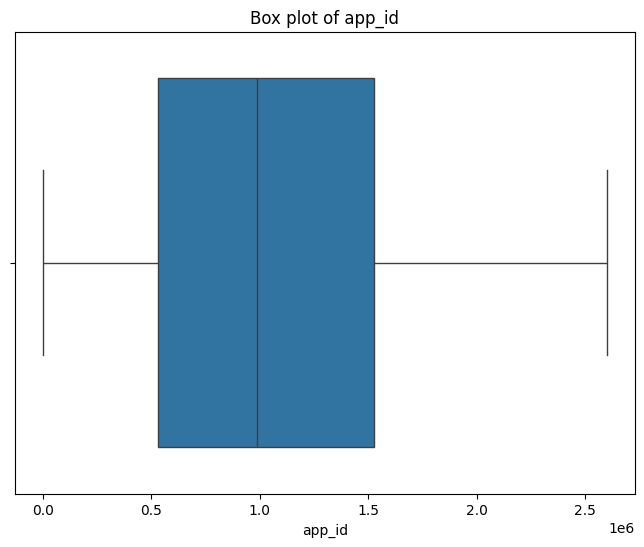

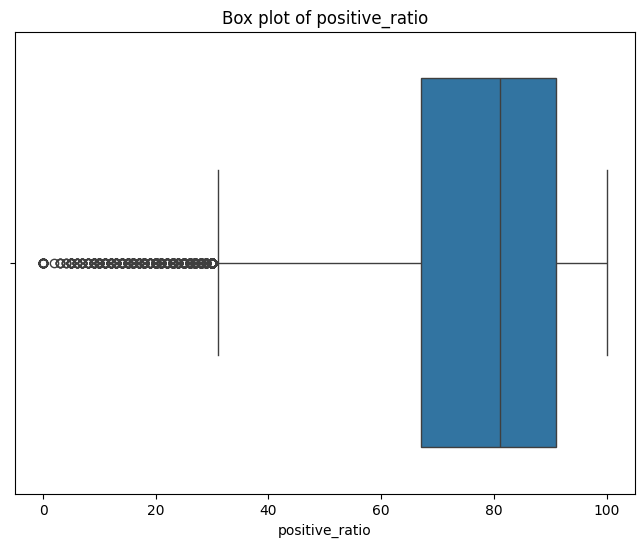

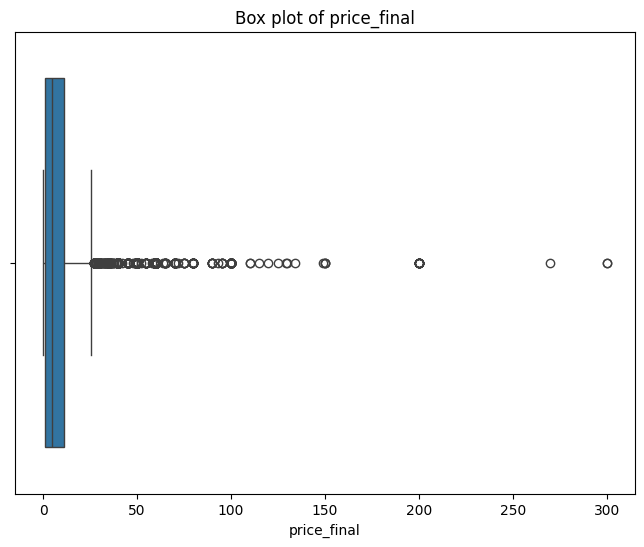

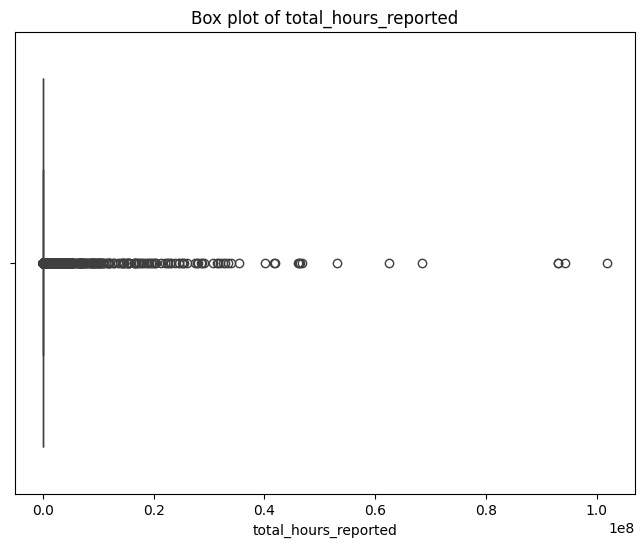

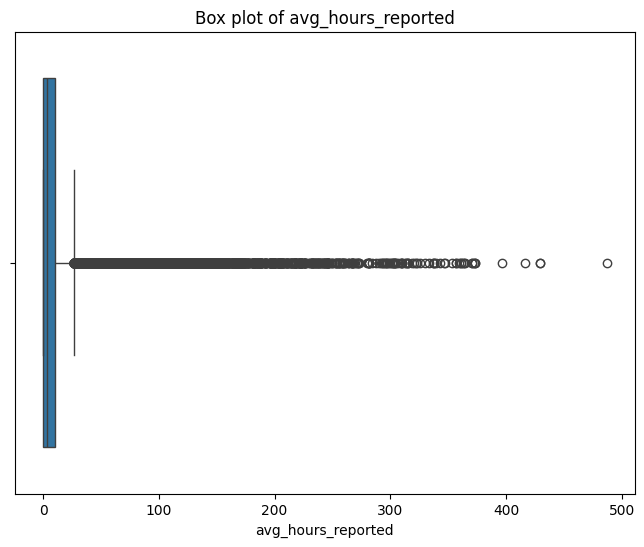

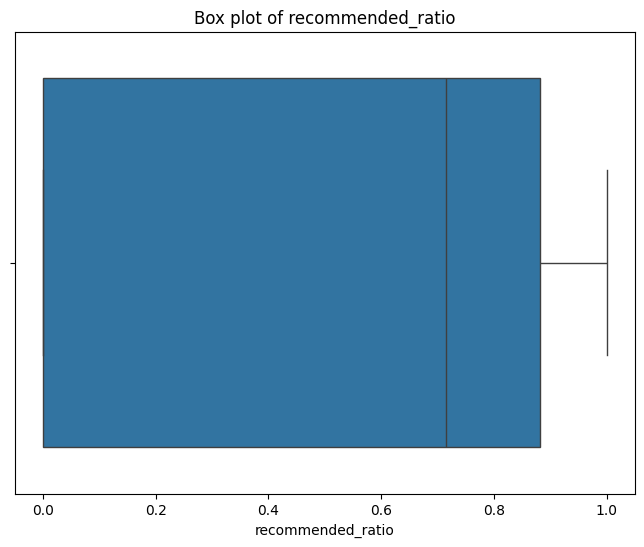

In [9]:
for feature in final_game_features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=final_game_features[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

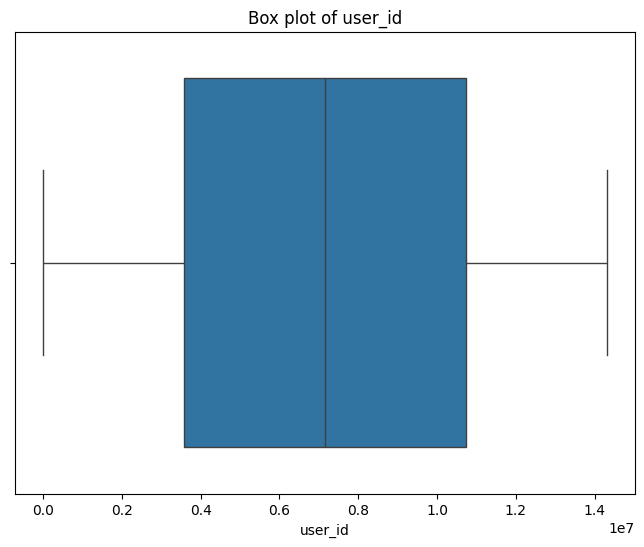

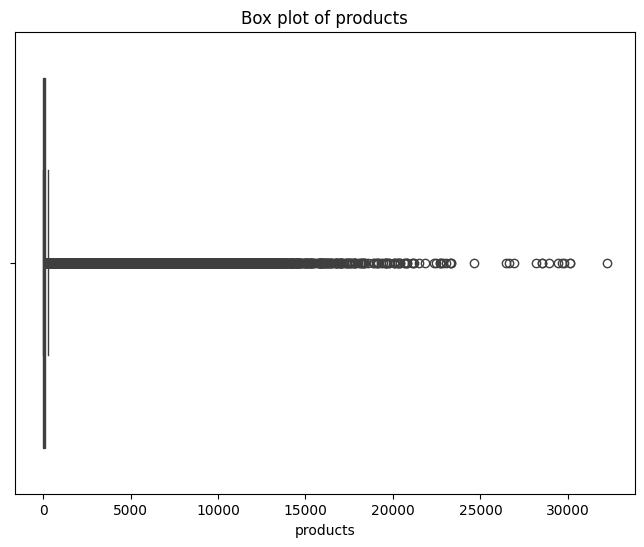

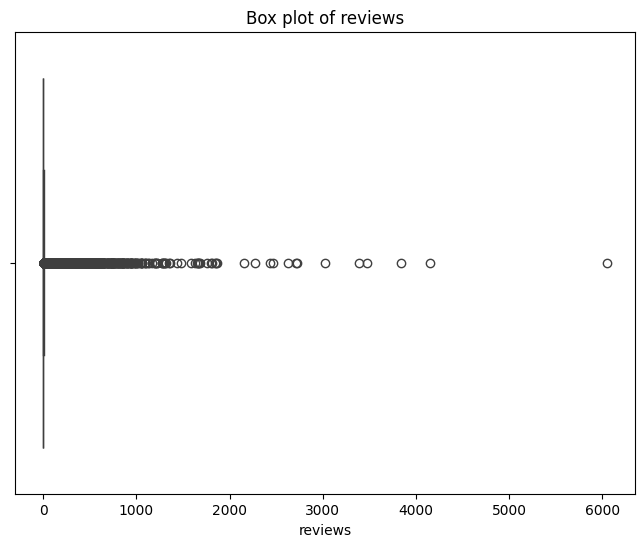

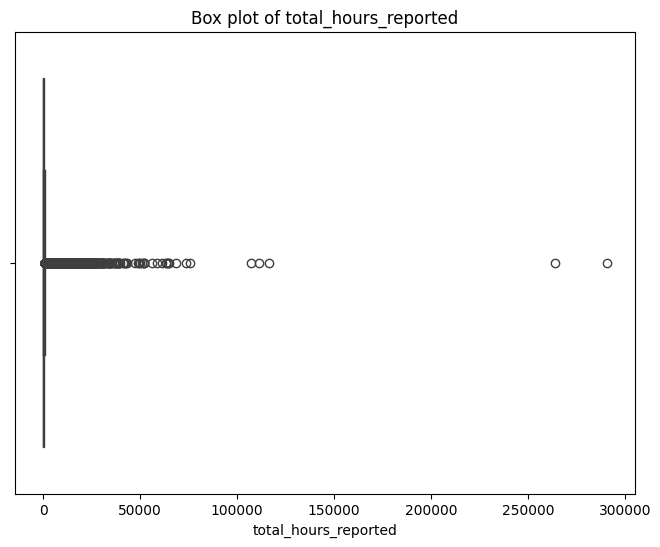

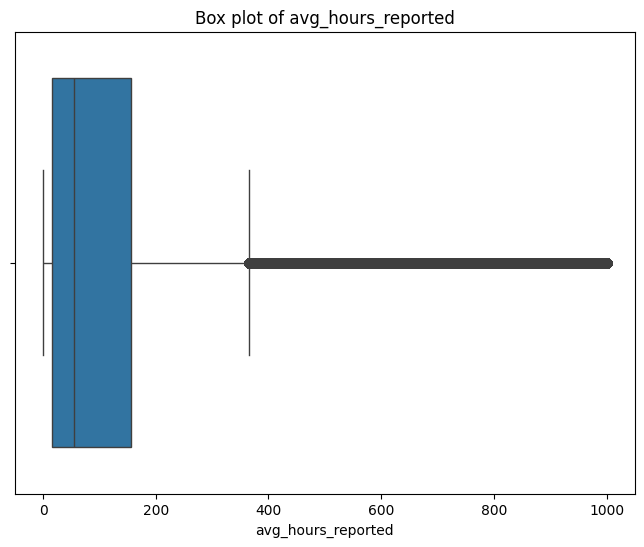

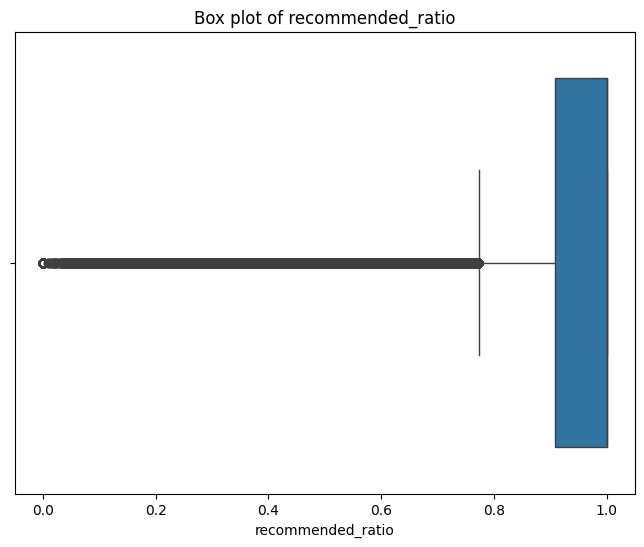

In [10]:
for feature in final_user_features.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=final_user_features[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

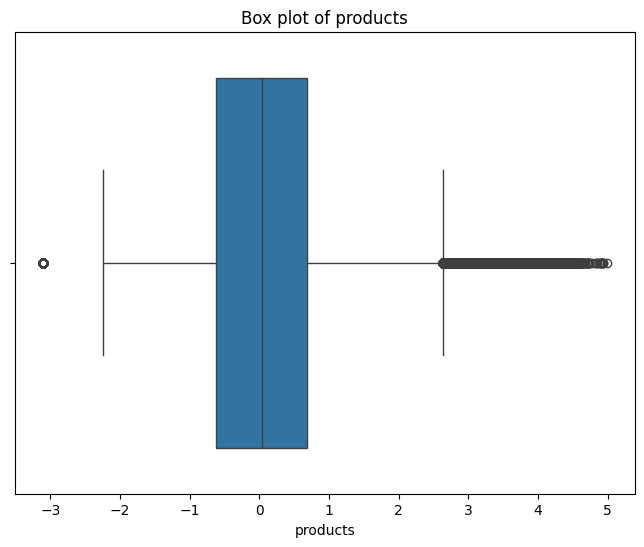

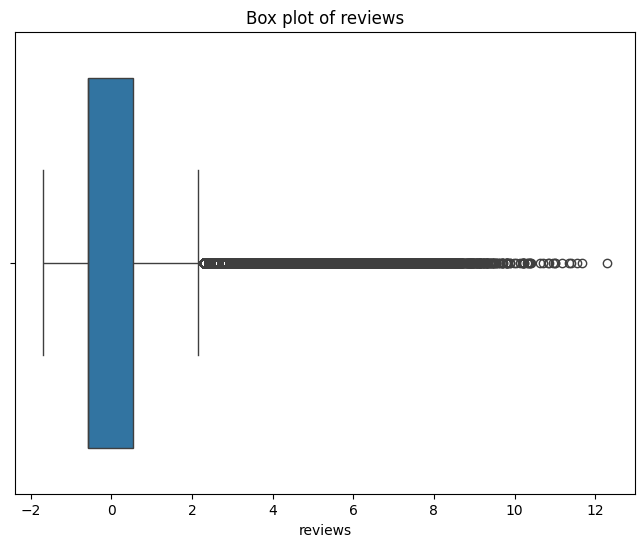

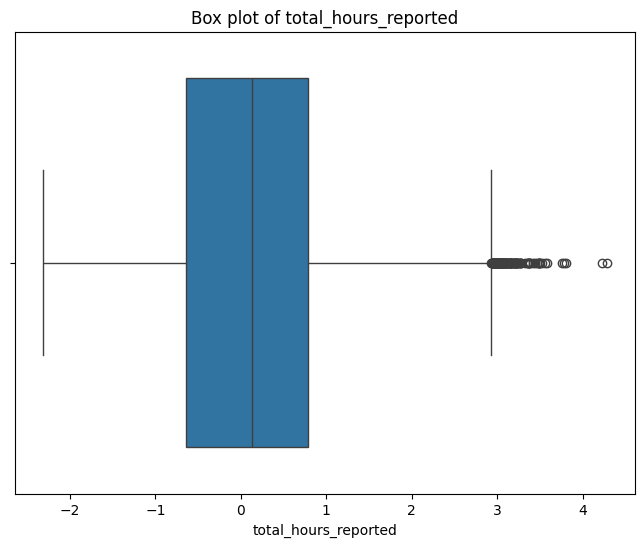

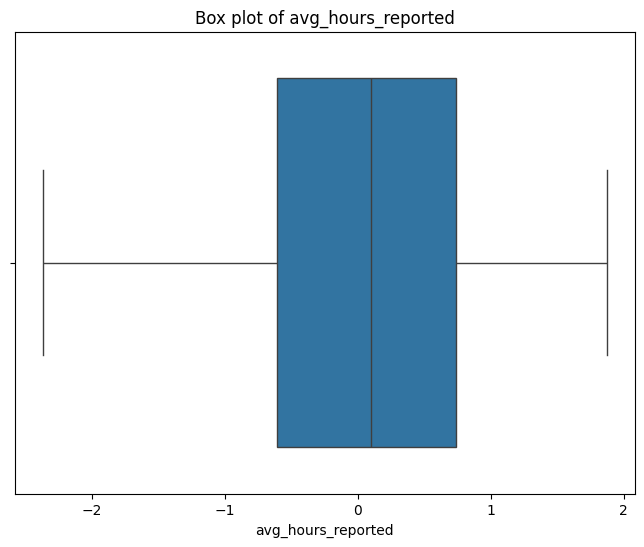

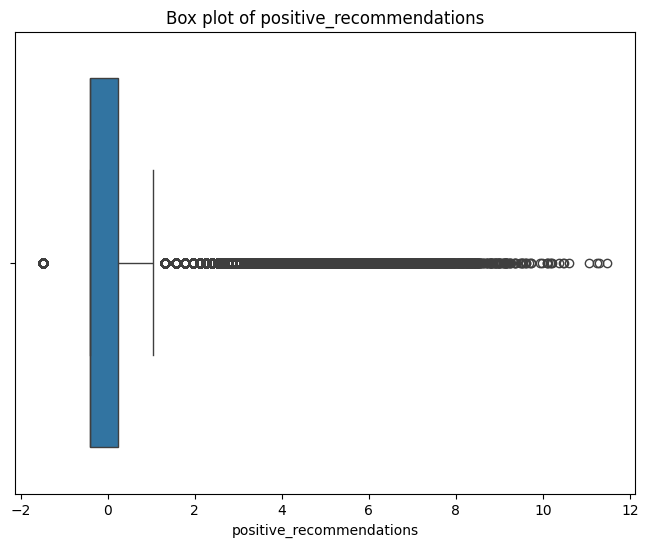

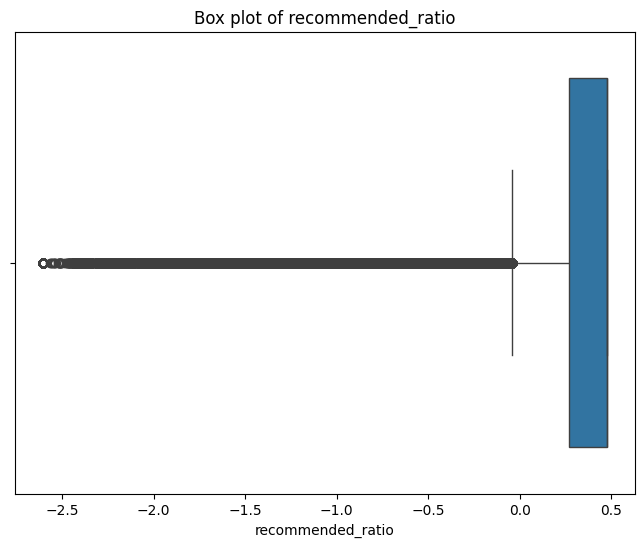

In [11]:
columns = final_user_features.columns.tolist()
columns.remove('user_id')
standardized_final_user_features = np.log(final_user_features[columns] + 1)

scaler = StandardScaler()
for feature in standardized_final_user_features.select_dtypes(include=['float64', 'int64']).columns:
    standardized_final_user_features[feature] = scaler.fit_transform(standardized_final_user_features[[feature]])
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=standardized_final_user_features[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

[1.5399443191235331, 1.2402191163375937, 1.1792841855106533, 1.250738261245875, 1.220713909770692, 1.1763985093579001, 1.1674156124662087, 1.1493642684874714, 1.108783024081508, 1.0948367926124674]


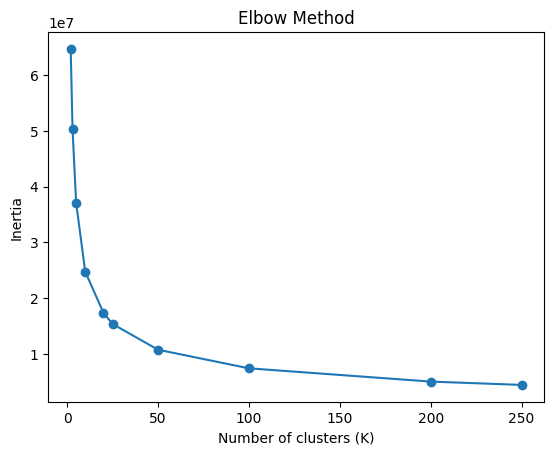

In [12]:
inertia = []
dbis = []

K_range = [2,3,5,10,20,25,50,100, 200, 250]
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_final_user_features)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(standardized_final_user_features, labels)
    dbis.append(dbi)

print(dbis)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [13]:
categories = ['Overwhelmingly Negative', 'Very Negative', 'Negative', 'Mostly Negative', 'Mixed', 'Mostly Positive', 'Positive', 'Very Positive', 'Overwhelmingly Positive']
ordinal_encoder = OrdinalEncoder(categories=[categories])
final_game_features['rating'] = ordinal_encoder.fit_transform(games[['rating']])

final_game_features['date'] = pd.to_datetime(final_game_features['date_release'])
final_game_features['release_year'] = final_game_features['date'].dt.year
final_game_features.drop('date', axis=1, inplace=True)
final_game_features.drop('date_release', axis=1, inplace=True)



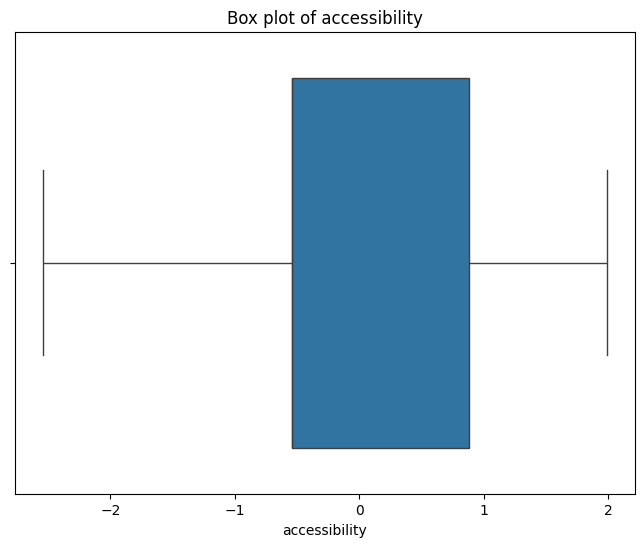

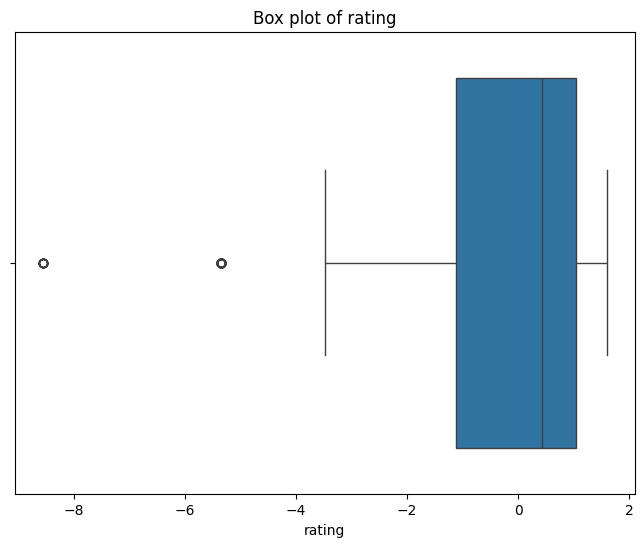

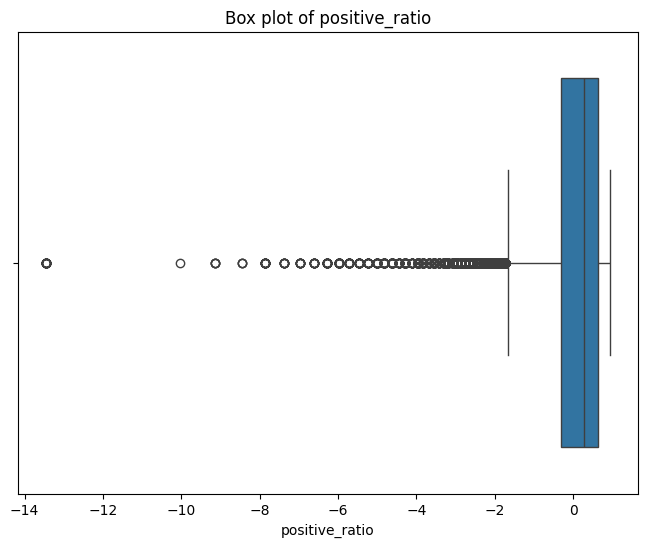

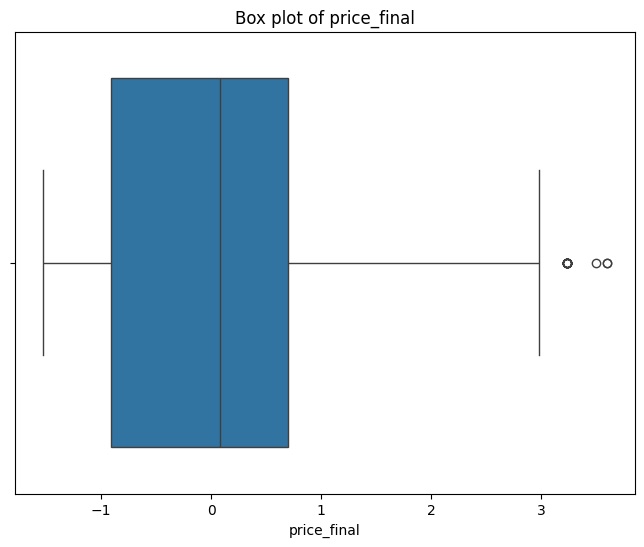

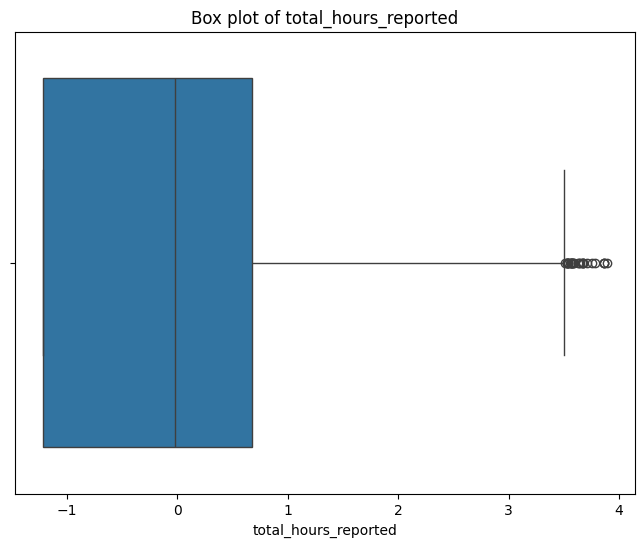

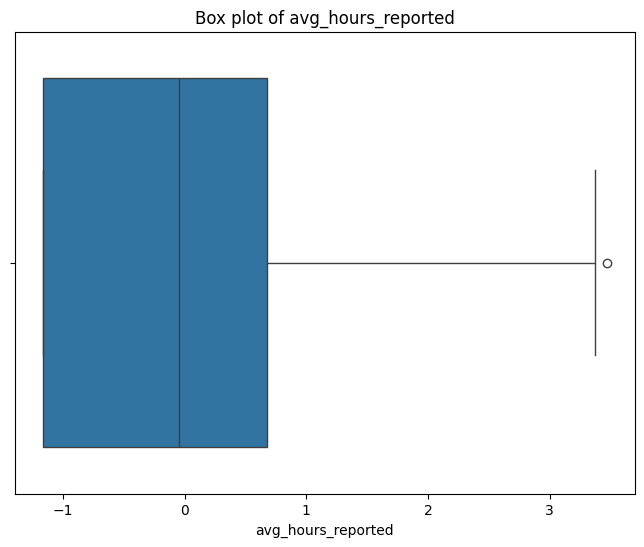

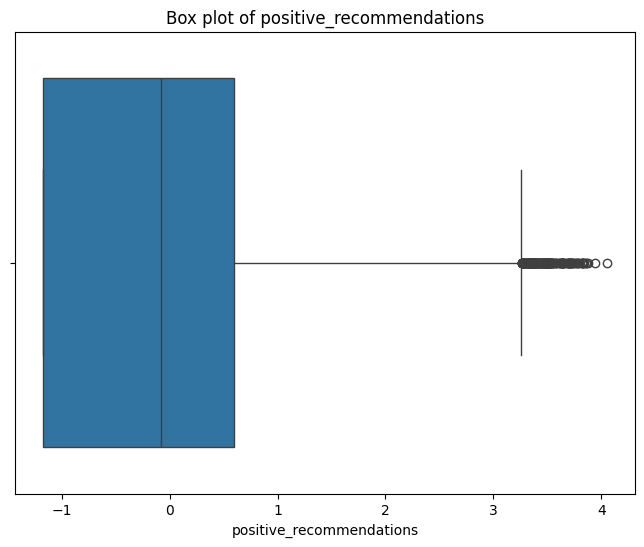

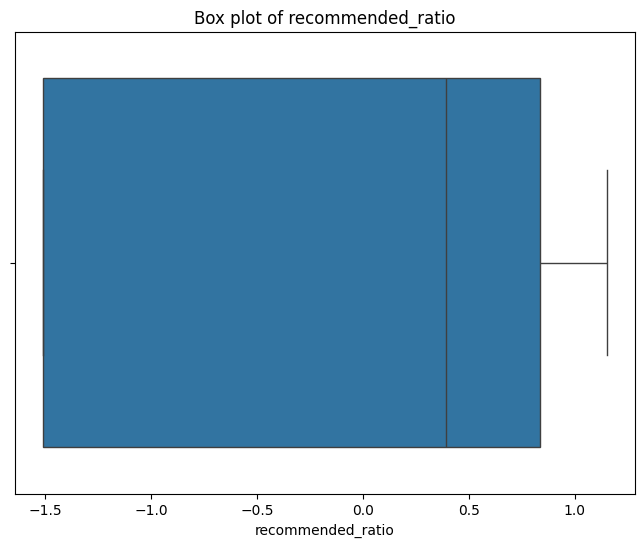

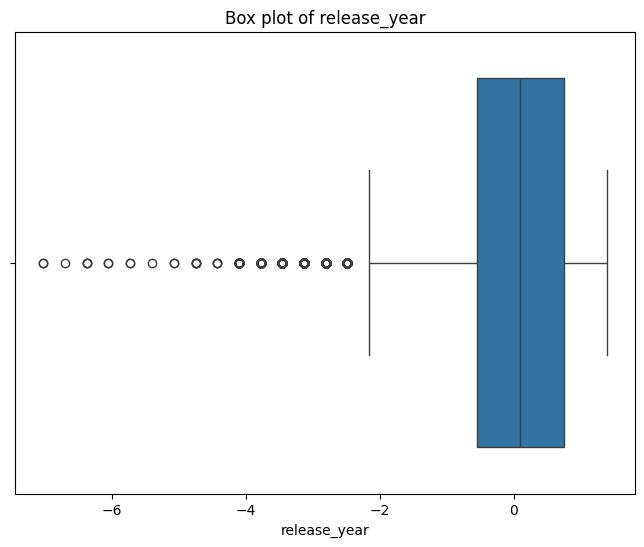

In [14]:
columns = final_game_features.columns.tolist()
columns.remove('app_id')
columns.remove('title')
standardized_final_game_features = np.log(final_game_features[columns] + 1)
standardized_final_game_features['recommended_ratio'] = final_game_features['recommended_ratio']

scaler = StandardScaler()
for feature in standardized_final_game_features.select_dtypes(include=['float64', 'int64']).columns:
    standardized_final_game_features[feature] = scaler.fit_transform(standardized_final_game_features[[feature]])
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=standardized_final_game_features[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()

C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

[2.0751760989719856, 1.8332175020279824, 1.6688164916268793, 1.6280222568913643, 1.4880599207072727, 1.470569885404435, 1.4515456379096565, 1.4662345128420085, 1.5299974475757403, 1.4967917376220525]


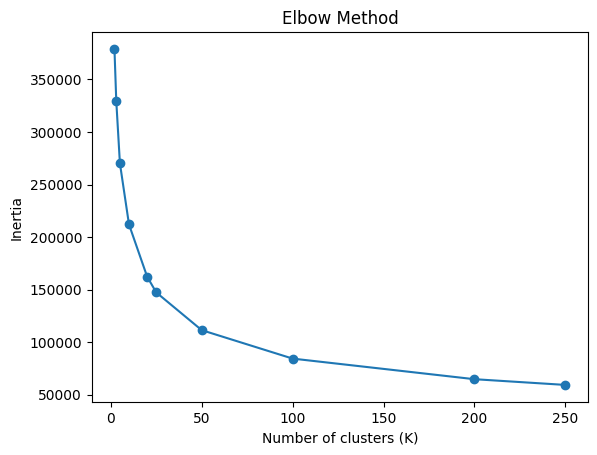

In [15]:
inertia = []
dbis = []

K_range = [2,3,5,10,20,25,50,100, 200, 250]
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(standardized_final_game_features)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(standardized_final_game_features, labels)
    dbis.append(dbi)

print(dbis)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [16]:
kmeans_user = KMeans(n_clusters=250, random_state=42)
kmeans_user.fit(standardized_final_user_features)
standardized_final_user_features['cluster'] = kmeans_user.labels_

C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
kmeans_game = KMeans(n_clusters=50, random_state=42)
kmeans_game.fit(standardized_final_game_features)
standardized_final_game_features['cluster'] = kmeans_game.labels_

C:\Users\matt4\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
final_user_features['user_cluster'] = kmeans_user.labels_
final_game_features['game_cluster'] = kmeans_game.labels_

In [19]:
final_game_features.columns

Index(['app_id', 'title', 'accessibility', 'rating', 'positive_ratio',
       'price_final', 'total_hours_reported', 'avg_hours_reported',
       'positive_recommendations', 'recommended_ratio', 'release_year',
       'game_cluster'],
      dtype='object')

In [20]:
recommendations = pd.merge(recommendations, final_user_features[['user_id', 'user_cluster']], on='user_id', how='left')

In [21]:
recommendations = pd.merge(recommendations, final_game_features[['app_id', 'game_cluster']], on='app_id', how='left')

In [22]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id,user_cluster,game_cluster
0,975370,0,0,2022-12-12,True,36.3,51580,0,124,27
1,304390,4,0,2017-02-17,False,11.5,2586,1,12,27
2,1085660,2,0,2019-11-17,True,336.5,253880,2,27,43
3,703080,0,0,2022-09-23,True,27.4,259432,3,169,27
4,526870,0,0,2021-01-10,True,7.9,23869,4,73,11
...,...,...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789,51,11
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790,85,21
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791,94,27
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792,105,27


In [23]:
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)
user_item_matrix = pd.pivot_table(recommendations, index="user_cluster", columns="game_cluster", values="is_recommended", aggfunc='sum', fill_value=0)

In [24]:
user_item_matrix

game_cluster,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
user_cluster,,,,,,,,,,,,,,,,,,,,,
0,21714,4,255,5809,11,37877,362,5886,22,1159,...,879,30198,27111,18894,55,23,1563,1782,1933,40
1,3902,0,0,2060,0,11377,1,140,1,22,...,4,13929,3782,12042,4,0,142,10,26,0
2,921,0,1,281,0,2987,0,36,1,10,...,9,3531,1445,4592,1,0,47,10,20,1
3,3898,0,27,1733,2,10786,39,798,4,112,...,62,10526,4742,10505,4,0,190,124,111,3
4,5463,1,23,2591,2,14599,27,940,0,136,...,92,15739,6907,14705,6,3,303,165,203,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2980,0,0,1451,1,8241,3,210,5,48,...,58,6609,6136,2467,2,0,347,87,196,0
246,1091,0,0,266,0,2726,1,73,1,13,...,1,2218,805,8015,1,0,21,3,6,0
247,9951,2,78,3708,1,26419,126,2638,13,318,...,185,22738,11372,28343,9,4,483,426,345,9


In [25]:
averageValues = []
for feature in standardized_final_user_features.select_dtypes(include=['float64', 'int64']).columns:
    print(standardized_final_user_features[feature].mean())
    averageValues.append(standardized_final_user_features[feature].mean())

new_user = np.array([averageValues])
centroids = kmeans_user.cluster_centers_
distances = pairwise_distances(new_user, centroids)
closest_cluster_idx = np.argmin(distances)

3.4898349510475505e-15
-1.0920435725510857e-16
1.117155329859057e-15
-2.6449832528071478e-15
2.15367936983188e-15
-5.1829554537443134e-15


In [26]:
preferred_game_cluster = user_item_matrix.loc[closest_cluster_idx].idxmax()

In [27]:
game_recommendations = final_game_features[final_game_features['game_cluster'] == preferred_game_cluster]

In [28]:
sorted_game_recommendations = game_recommendations.sort_values(by='total_hours_reported', ascending=False)
sorted_game_recommendations.head(10)

,app_id,title,accessibility,rating,positive_ratio,price_final,total_hours_reported,avg_hours_reported,positive_recommendations,recommended_ratio,release_year,game_cluster
14398,730,Counter-Strike: Global Offensive,4,7.0,88,15.0,94260307.3,428.968755,23,0.396552,2012,27
13173,252490,Rust,3,7.0,87,40.0,92944004.6,343.367191,924,0.839237,2018,27
47760,394360,Hearts of Iron IV,4,7.0,92,40.0,53086631.1,370.750355,12,0.923077,2016,27
47689,346110,ARK: Survival Evolved,3,7.0,83,15.0,46720359.4,292.484846,28,0.965517,2017,27
12744,107410,Arma 3,3,7.0,91,30.0,41854352.4,309.296801,155,0.778894,2013,27
13181,377160,Fallout 4,2,7.0,83,20.0,40149411.3,204.022640,1998,0.559037,2015,27
16071,374320,DARK SOULS™ III,2,7.0,94,30.0,32467657.9,170.741324,68593,0.924920,2016,27
47538,227300,Euro Truck Simulator 2,4,8.0,97,20.0,32000932.1,178.370588,22,1.000000,2012,27
12800,292030,The Witcher® 3: Wild Hunt,2,8.0,96,40.0,31522739.6,154.397596,2154,0.906947,2015,27
15722,381210,Dead by Daylight,2,7.0,80,10.0,27961163.7,346.990193,7,1.000000,2016,27


In [29]:
preferred_game_cluster

27

In [30]:
user_item_matrix.loc[closest_cluster_idx]

game_cluster
0      6922
1         1
2        23
3      2989
4         2
5     17409
6        69
7      1447
8        12
9       233
10        1
11    28750
12        0
13       48
14        1
15      170
16      172
17     5582
18      120
19     3356
20      113
21     5090
22      144
23        2
24      117
25        1
26     3581
27    53635
28       90
29       28
30      209
31        1
32        1
33        4
34      112
35     7716
36        0
37        0
38     1567
39      487
40      192
41    16779
42     9224
43    10851
44        6
45        3
46      422
47      345
48      331
49        2
Name: 26, dtype: int32

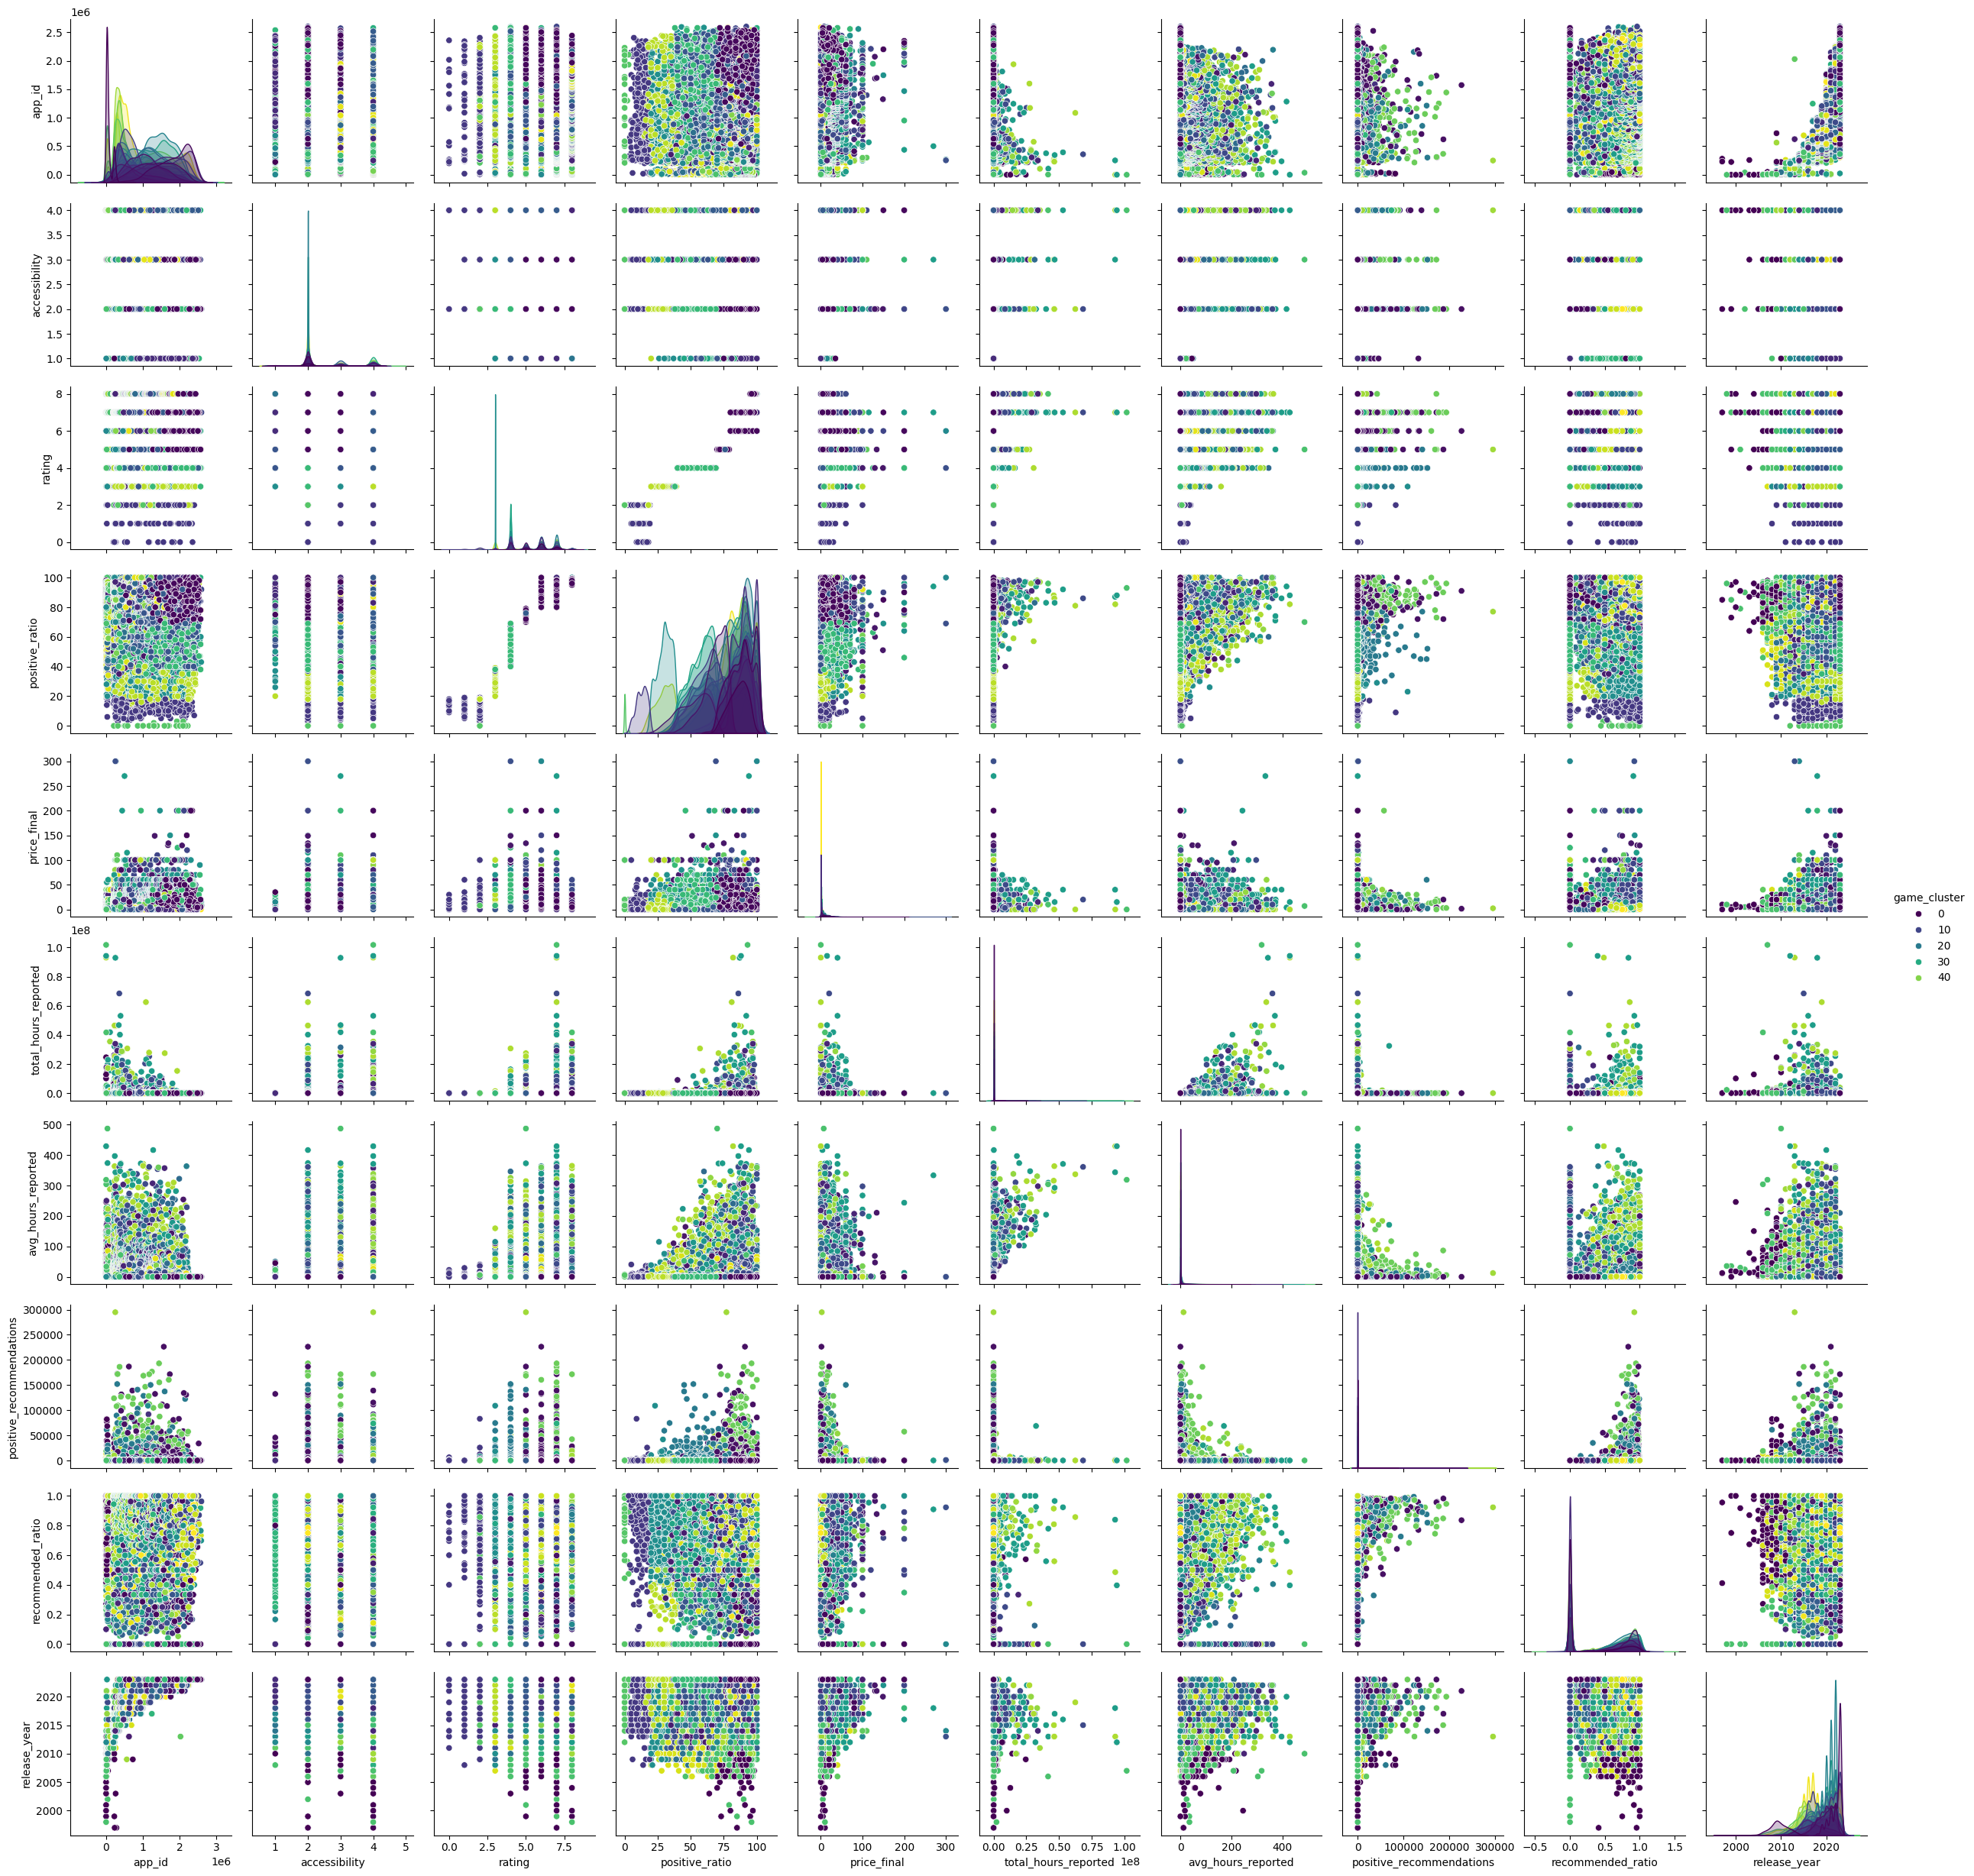

In [32]:
sns.pairplot(final_game_features, hue='game_cluster', palette='viridis')
plt.show()